## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон
| Студент | Аксенов |
|---------|--------|
| Группа  | 6      |


In [1]:
import sys  
from MyFramework import * 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### MNIST

In [2]:
def change_label(x):
    
    back = np.zeros(10)
    back[x] = 1
    return back

def accuracy(lbl, pred):
    return sum(lbl == pred)/len(lbl)
    

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape((60000, 28*28))/255, x_test.reshape((10000, 28*28))/255
y_train, y_test = np.array([change_label(i) for i in y_train]), np.array([change_label(i) for i in y_test])

##### Однослойный перцептрон

In [4]:
model = NN(sizes=[28*28, 10],activations=[softmax],epochs=36)
model.train(x_train, y_train, x_test, y_test)

Epoch: 1, Time Spent: 27.60s, Accuracy: 26.35%
Epoch: 2, Time Spent: 59.95s, Accuracy: 39.99%
Epoch: 3, Time Spent: 91.58s, Accuracy: 51.44%
Epoch: 4, Time Spent: 121.40s, Accuracy: 60.06%
Epoch: 5, Time Spent: 150.19s, Accuracy: 65.96%
Epoch: 6, Time Spent: 175.99s, Accuracy: 70.11%
Epoch: 7, Time Spent: 203.87s, Accuracy: 73.06%
Epoch: 8, Time Spent: 228.16s, Accuracy: 75.53%
Epoch: 9, Time Spent: 253.65s, Accuracy: 77.26%
Epoch: 10, Time Spent: 279.56s, Accuracy: 78.62%
Epoch: 11, Time Spent: 309.43s, Accuracy: 79.63%
Epoch: 12, Time Spent: 334.12s, Accuracy: 80.47%
Epoch: 13, Time Spent: 357.50s, Accuracy: 81.27%
Epoch: 14, Time Spent: 378.26s, Accuracy: 81.73%
Epoch: 15, Time Spent: 398.16s, Accuracy: 82.17%
Epoch: 16, Time Spent: 419.61s, Accuracy: 82.76%
Epoch: 17, Time Spent: 442.62s, Accuracy: 83.12%
Epoch: 18, Time Spent: 469.77s, Accuracy: 83.55%
Epoch: 19, Time Spent: 494.89s, Accuracy: 83.87%
Epoch: 20, Time Spent: 520.11s, Accuracy: 84.15%
Epoch: 21, Time Spent: 547.23s, 

In [5]:
print('Доля верный ответов на обучающей выборки = ',accuracy(np.argmax(y_train,1),model.predict(x_train.T)))

Доля верный ответов на обучающей выборки =  0.8656


In [6]:
print('Доля верный ответов на тестовой выборки = ',accuracy(np.argmax(y_test,1),model.predict(x_test.T)))

Доля верный ответов на тестовой выборки =  0.8699


In [7]:
# На обучающей выборке
confusion_matrix(np.argmax(y_train,1),model.predict(x_train.T))

array([[5571,    0,   38,   24,   16,   80,   76,   16,   86,   16],
       [   0, 6459,   53,   25,    9,   34,   10,   29,  110,   13],
       [  81,   86, 4965,  129,  138,   28,  144,  139,  191,   57],
       [  38,   40,  206, 5079,   19,  288,   59,   97,  191,  114],
       [  18,   30,   39,   12, 5083,   22,   89,   25,  102,  422],
       [ 124,   83,   57,  270,  108, 4135,  147,   58,  354,   85],
       [  64,   41,   90,   14,   85,  105, 5424,    9,   81,    5],
       [  55,   63,   88,   44,  120,   14,    8, 5586,   37,  250],
       [  53,  152,  102,  251,   49,  287,   77,   39, 4707,  134],
       [  48,   39,   53,  116,  340,   51,   10,  255,  110, 4927]],
      dtype=int64)

In [8]:
# На тестовой выборке
confusion_matrix(np.argmax(y_test,1),model.predict(x_test.T))

array([[ 929,    0,    5,    4,    1,   12,   17,    2,    9,    1],
       [   0, 1093,    3,    6,    0,    3,    7,    0,   22,    1],
       [  21,   13,  844,   33,   16,    2,   18,   26,   44,   15],
       [   5,    1,   25,  866,    2,   46,    5,   20,   30,   10],
       [   4,    4,    1,    4,  856,    1,   23,    3,   18,   68],
       [  13,    8,    8,   46,   23,  687,   27,   17,   51,   12],
       [  15,    2,   12,    1,   17,   24,  869,    7,   10,    1],
       [   6,   16,   27,    8,   15,    1,    0,  914,    5,   36],
       [  11,   13,   16,   37,   13,   35,   19,   13,  798,   19],
       [  11,    5,    9,    7,   70,   17,    2,   33,   12,  843]],
      dtype=int64)

In [9]:
# Исследование точности от lr
lrs = [0.1, 0.01, 0.001, 0.0001, 0.00001]
y_acc_train, y_acc_test = [], []

for i in lrs:
    
    model = NN(sizes=[28*28, 10],activations=[softmax],epochs=15, l_rate=i)
    model.train(x_train, y_train, x_test, y_test)
    
    y_acc_train.append(accuracy(np.argmax(y_train,1), model.predict(x_train.T)))
    y_acc_test.append(accuracy(np.argmax(y_test,1), model.predict(x_test.T)))


Epoch: 1, Time Spent: 24.96s, Accuracy: 89.38%
Epoch: 2, Time Spent: 56.89s, Accuracy: 90.62%
Epoch: 3, Time Spent: 86.11s, Accuracy: 91.15%
Epoch: 4, Time Spent: 114.00s, Accuracy: 91.31%
Epoch: 5, Time Spent: 141.24s, Accuracy: 91.50%
Epoch: 6, Time Spent: 168.15s, Accuracy: 91.64%
Epoch: 7, Time Spent: 191.88s, Accuracy: 91.71%
Epoch: 8, Time Spent: 219.33s, Accuracy: 91.69%
Epoch: 9, Time Spent: 242.70s, Accuracy: 91.75%
Epoch: 10, Time Spent: 269.80s, Accuracy: 91.84%
Epoch: 11, Time Spent: 296.21s, Accuracy: 91.86%
Epoch: 12, Time Spent: 322.13s, Accuracy: 91.91%
Epoch: 13, Time Spent: 349.14s, Accuracy: 91.96%
Epoch: 14, Time Spent: 376.21s, Accuracy: 92.04%
Epoch: 15, Time Spent: 401.03s, Accuracy: 92.11%
Epoch: 1, Time Spent: 26.85s, Accuracy: 77.55%
Epoch: 2, Time Spent: 53.75s, Accuracy: 83.87%
Epoch: 3, Time Spent: 81.81s, Accuracy: 86.15%
Epoch: 4, Time Spent: 108.39s, Accuracy: 87.32%
Epoch: 5, Time Spent: 130.70s, Accuracy: 88.15%
Epoch: 6, Time Spent: 157.74s, Accuracy:

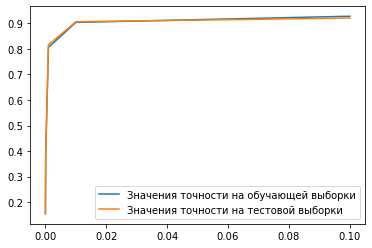

In [10]:
plt.plot(lrs, y_acc_train, label='Значения точности на обучающей выборки')
plt.plot(lrs, y_acc_test, label='Значения точности на тестовой выборки')
plt.legend()

##### Многослойный перцептрон( С 1 скрытым слоем)

In [11]:
model = NN(sizes=[28*28, 128, 10],activations=[sigmoid, sigmoid, softmax],epochs=36,l_rate=0.1)
model.train(x_train, y_train, x_test, y_test)

Epoch: 1, Time Spent: 135.07s, Accuracy: 91.17%
Epoch: 2, Time Spent: 172.94s, Accuracy: 92.81%
Epoch: 3, Time Spent: 211.12s, Accuracy: 93.72%
Epoch: 4, Time Spent: 249.33s, Accuracy: 94.58%
Epoch: 5, Time Spent: 287.60s, Accuracy: 94.98%
Epoch: 6, Time Spent: 325.43s, Accuracy: 95.49%
Epoch: 7, Time Spent: 363.44s, Accuracy: 95.77%
Epoch: 8, Time Spent: 401.57s, Accuracy: 96.11%
Epoch: 9, Time Spent: 439.84s, Accuracy: 96.42%
Epoch: 10, Time Spent: 478.13s, Accuracy: 96.58%
Epoch: 11, Time Spent: 516.14s, Accuracy: 96.74%
Epoch: 12, Time Spent: 554.43s, Accuracy: 96.87%
Epoch: 13, Time Spent: 592.50s, Accuracy: 96.96%
Epoch: 14, Time Spent: 630.81s, Accuracy: 97.02%
Epoch: 15, Time Spent: 668.98s, Accuracy: 97.10%
Epoch: 16, Time Spent: 707.28s, Accuracy: 97.14%
Epoch: 17, Time Spent: 745.57s, Accuracy: 97.23%
Epoch: 18, Time Spent: 783.80s, Accuracy: 97.29%
Epoch: 19, Time Spent: 821.93s, Accuracy: 97.29%
Epoch: 20, Time Spent: 860.32s, Accuracy: 97.36%
Epoch: 21, Time Spent: 898.49

In [12]:
print('Доля верный ответов на обучающей выборки = ',accuracy(np.argmax(y_train,1),model.predict(x_train.T)))

Доля верный ответов на обучающей выборки =  0.9910666666666667


In [13]:
print('Доля верный ответов на тестовой выборки = ',accuracy(np.argmax(y_test,1),model.predict(x_test.T)))

Доля верный ответов на тестовой выборки =  0.976


In [14]:
# Исследование точности от кол-ва нейронов
nns = [128*2, 128, 64,32]
y_acc_train, y_acc_test = [], []

for i in nns:
    
    model = NN(sizes=[28*28, i, 10],activations=[sigmoid, sigmoid, softmax],epochs=5, l_rate=0.1)
    model.train(x_train, y_train, x_test, y_test)
    
    y_acc_train.append(accuracy(np.argmax(y_train,1), model.predict(x_train.T)))
    y_acc_test.append(accuracy(np.argmax(y_test,1), model.predict(x_test.T)))


Epoch: 1, Time Spent: 144.68s, Accuracy: 91.30%
Epoch: 2, Time Spent: 289.32s, Accuracy: 92.78%
Epoch: 3, Time Spent: 422.87s, Accuracy: 93.87%
Epoch: 4, Time Spent: 563.48s, Accuracy: 94.65%
Epoch: 5, Time Spent: 709.00s, Accuracy: 95.15%
Epoch: 1, Time Spent: 37.92s, Accuracy: 91.10%
Epoch: 2, Time Spent: 75.92s, Accuracy: 92.83%
Epoch: 3, Time Spent: 113.71s, Accuracy: 93.75%
Epoch: 4, Time Spent: 151.59s, Accuracy: 94.57%
Epoch: 5, Time Spent: 189.72s, Accuracy: 95.03%
Epoch: 1, Time Spent: 23.88s, Accuracy: 90.96%
Epoch: 2, Time Spent: 47.88s, Accuracy: 92.56%
Epoch: 3, Time Spent: 71.95s, Accuracy: 93.64%
Epoch: 4, Time Spent: 96.07s, Accuracy: 94.12%
Epoch: 5, Time Spent: 120.06s, Accuracy: 94.64%
Epoch: 1, Time Spent: 17.51s, Accuracy: 90.72%
Epoch: 2, Time Spent: 35.20s, Accuracy: 92.42%
Epoch: 3, Time Spent: 52.67s, Accuracy: 93.29%
Epoch: 4, Time Spent: 70.15s, Accuracy: 93.77%
Epoch: 5, Time Spent: 87.71s, Accuracy: 94.12%


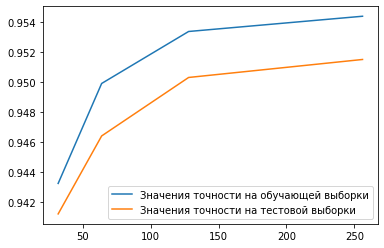

In [15]:
plt.plot(nns, y_acc_train, label='Значения точности на обучающей выборки')
plt.plot(nns, y_acc_test, label='Значения точности на тестовой выборки')
plt.legend()

###### Выводы 
- Модель с одним слоем неплохо справилась с задачей 
- Модель с тремя слоями неплохо справилась с задачей 
- Касательно выборка скорости обучения, значение 0.01 является оптимальным 
- Касательно выбора количества нейронов на скрытом слое видна тенденция, что чем больше нейронов, тем выше точность 

#### Dataset FashionMNIST

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.reshape((60000, 28*28))/255, x_test.reshape((10000, 28*28))/255
y_train, y_test = np.array([change_label(i) for i in y_train]), np.array([change_label(i) for i in y_test])

In [17]:
model = NN(sizes=[28*28, 28*28*3, 10],activations=[sigmoid, sigmoid, softmax],epochs=5)
model.train(x_train, y_train, x_test, y_test)

Epoch: 1, Time Spent: 1720.58s, Accuracy: 71.20%
Epoch: 2, Time Spent: 2945.70s, Accuracy: 72.82%
Epoch: 3, Time Spent: 4170.58s, Accuracy: 73.47%
Epoch: 4, Time Spent: 5395.57s, Accuracy: 73.82%
Epoch: 5, Time Spent: 6620.47s, Accuracy: 74.16%


In [18]:
print('Доля верный ответов на обучающей выборки = ',accuracy(np.argmax(y_train,1),model.predict(x_train.T)))

Доля верный ответов на обучающей выборки =  0.753


In [19]:
print('Доля верный ответов на тестовой выборки = ',accuracy(np.argmax(y_test,1),model.predict(x_test.T)))

Доля верный ответов на тестовой выборки =  0.7416


In [20]:
# На обучающей выборке
confusion_matrix(np.argmax(y_train,1),model.predict(x_train.T))

array([[5222,   10,  103,  306,   26,   14,  222,    0,   97,    0],
       [  23, 5676,   81,  185,   20,    2,   10,    0,    3,    0],
       [  98,    8, 4536,   63,  905,   19,  310,    0,   61,    0],
       [ 282,   43,   92, 5238,  241,    5,   80,    0,   19,    0],
       [  20,   10,  504,  205, 4887,   10,  318,    0,   46,    0],
       [  19,    1,    5,   12,    1, 5525,    6,  363,   68,    0],
       [1267,   12,  851,  230,  730,   18, 2737,    4,  151,    0],
       [   1,    0,    0,    0,    0,  274,    1, 5701,   23,    0],
       [  36,    2,   40,   81,   34,   50,   68,   31, 5658,    0],
       [ 131,    4,   98,   33,   60, 2344,  148, 2821,  361,    0]],
      dtype=int64)

In [21]:
# На тестовой выборке
confusion_matrix(np.argmax(y_test,1),model.predict(x_test.T))

array([[854,   2,  18,  53,   8,   5,  44,   0,  16,   0],
       [  6, 937,  12,  37,   6,   0,   0,   0,   2,   0],
       [ 22,   2, 737,  11, 159,   0,  53,   0,  16,   0],
       [ 43,   8,  15, 868,  40,   0,  22,   0,   4,   0],
       [  1,   2, 110,  45, 782,   1,  51,   0,   8,   0],
       [  2,   0,   0,   4,   0, 910,   0,  72,  12,   0],
       [206,   0, 151,  47, 133,   3, 424,   0,  36,   0],
       [  1,   0,   0,   0,   0,  39,   0, 958,   2,   0],
       [  2,   1,   9,  13,   3,  10,  11,   5, 946,   0],
       [ 18,   0,  13,   2,   8, 386,  32, 483,  58,   0]], dtype=int64)

###### Выводы 
- Переобучение не наблюдается, потому что метрика сильно не отличается на обучающей и тестовой выборке 
- Модель хорошо справилась с задачей 